#Import the Libraries

In [19]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Load Image Dataset and Annotations

In [31]:
directory = r"C:\Users\ARUNDEV V\Desktop\Project-Person Identification\faces"
image_paths=[]
for i in os.listdir(directory):
    for j in os.listdir(os.path.join(directory,i)):
      image_paths.append(os.path.join(directory,i,j))
print(len(image_paths),"images are Loaded Successfully!")

5796 images are Loaded Successfully!


In [32]:
image_paths[:3]

['C:\\Users\\ARUNDEV V\\Desktop\\Project-Person Identification\\faces\\n000002\\0001_01.jpg',
 'C:\\Users\\ARUNDEV V\\Desktop\\Project-Person Identification\\faces\\n000002\\0002_01.jpg',
 'C:\\Users\\ARUNDEV V\\Desktop\\Project-Person Identification\\faces\\n000002\\0003_01.jpg']

In [33]:
annot = pd.read_csv(r"C:\Users\ARUNDEV V\Desktop\Project-Person Identification\Dataset_full_download\VGG-Face2\meta\bb_landmark\bb_landmark\loose_landmark_train.csv")
annot = annot[:5796]
annot.tail()
# annot.to_csv('annotation.csv',index=False)

NAME_ID        P1X        P1Y        P2X        P2Y        P3X  \
5791  n000020/0474_01   67.74786   73.57693   94.37258   75.98112   84.83774   
5792  n000020/0475_01  104.27090  128.24850  151.59200  122.81790  134.80950   
5793  n000020/0476_01  110.61390  165.01620  178.79030  151.73310  148.71220   
5794  n000020/0478_01   86.51537   79.86084  100.96490   84.38177  101.11520   
5795  n000020/0483_01  139.92540  119.59350  153.83500  137.05710  151.78050   

            P3Y        P4X       P4Y        P5X       P5Y  
5791   91.13506   68.26711  103.5595   86.69887  104.8528  
5792  160.17920  117.19400  183.8256  153.14470  179.9103  
5793  206.89300  133.54180  226.5705  187.36880  217.4854  
5794  102.68930   80.19173  110.8890   92.24537  113.1582  
5795  153.73720  123.02490  164.6942  135.95560  175.9263

In [29]:
annot = pd.read_csv('annotation.csv')
annot.tail()

NAME_ID        P1X        P1Y        P2X        P2Y        P3X  \
5791  n000020/0474_01   67.74786   73.57693   94.37258   75.98112   84.83774   
5792  n000020/0475_01  104.27090  128.24850  151.59200  122.81790  134.80950   
5793  n000020/0476_01  110.61390  165.01620  178.79030  151.73310  148.71220   
5794  n000020/0478_01   86.51537   79.86084  100.96490   84.38177  101.11520   
5795  n000020/0483_01  139.92540  119.59350  153.83500  137.05710  151.78050   

            P3Y        P4X       P4Y        P5X       P5Y  
5791   91.13506   68.26711  103.5595   86.69887  104.8528  
5792  160.17920  117.19400  183.8256  153.14470  179.9103  
5793  206.89300  133.54180  226.5705  187.36880  217.4854  
5794  102.68930   80.19173  110.8890   92.24537  113.1582  
5795  153.73720  123.02490  164.6942  135.95560  175.9263

#Run this code only Once
Preparing the annotations csv file.

The NAME_ID is converted to the path of each image

In [37]:
# # image path updation on annotations csv file
# annot['NAME_ID'] = annot['NAME_ID'].apply(lambda x:"C:/Users/ARUNDEV V/Desktop/Project-Person Identification/faces/"+x+".jpg")
# # Saving the updated annotations csv file
# annot.to_csv('annot.csv',index=False)

#Load the annotations dataset after updation

In [39]:
annotations = pd.read_csv('annot.csv')
annotations

NAME_ID        P1X        P1Y  \
0     C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  239.46430  276.50540   
1     C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  179.10260  153.76450   
2     C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  193.29190  209.18740   
3     C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  132.23440  116.68580   
4     C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  115.79790  133.04390   
...                                                 ...        ...        ...   
5791  C:/Users/ARUNDEV V/Desktop/Project-Person Iden...   67.74786   73.57693   
5792  C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  104.27090  128.24850   
5793  C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  110.61390  165.01620   
5794  C:/Users/ARUNDEV V/Desktop/Project-Person Iden...   86.51537   79.86084   
5795  C:/Users/ARUNDEV V/Desktop/Project-Person Iden...  139.92540  119.59350   

            P2X        P2Y        P3X        P3Y        P4X       P4Y  \
0     349.84960  282.25990  311.24060  354.89740  236.03580  391.3312   
1     256.44960  154.48830  234.55420  205.96320  182.64870  242.1640   
2     292.35660  213.76440  259.33140  273.82690  200.89870  318.8509   
3     185.86290  108.41760  178.12080  148.49670  147.87410  178.1270   
4     172.00380  137.27210  149.90840  163.83960  118.14430  186.3547   
...         ...        ...        ...        ...        ...       ...   
5791   94.37258   75.98112   84.83774   91.13506   68.26711  103.5595   
5792  151.59200  122.81790  134.80950  160.17920  117.19400  183.8256   
5793  178.79030  151.73310  148.71220  206.89300  133.54180  226.5705   
5794  100.96490   84.38177  101.11520  102.68930   80.19173  110.8890   
5795  153.83500  137.05710  151.78050  153.73720  123.02490  164.6942   

            P5X       P5Y  
0     342.15410  392.2661  
1     251.81340  240.4333  
2     286.63050  319.3895  
3     191.57460  170.1250  
4     166.14740  188.7061  
...         ...       ...  
5791   86.69887  104.8528  
5792  153.14470  179.9103  
5793  187.36880  217.4854  
5794   92.24537  113.1582  
5795  135.95560  175.9263  

[5796 rows x 11 columns]

#Data Preprocessing

In [40]:
import pandas as pd
import cv2
import numpy as np

# Define the desired image size
desired_image_size = (224, 224)


# Initialize lists to store preprocessed data
images = []
landmarks = []

# Loop through each row of the DataFrame
for index, row in annotations.iterrows():
    image_path = row['NAME_ID']
    landmarks_row = [row[f'P{i}X'] for i in range(1, 6)] + [row[f'P{i}Y'] for i in range(1, 6)]

    # Load the image
    img = cv2.imread(image_path)

    # Resize the image to the desired size
    img = cv2.resize(img, desired_image_size)

    # Normalize the landmark coordinates to be in the range [0, 1]
    normalized_landmarks = [coord / img.shape[1] if i % 2 == 0 else coord / img.shape[0] for i, coord in enumerate(landmarks_row)]

    # Append the preprocessed data to the lists
    images.append(img)
    landmarks.append(normalized_landmarks)

# Convert the lists to NumPy arrays for further processing
images = np.array(images)
landmarks = np.array(landmarks)

Shape of the Image and Annotations

In [41]:
print("Image shape: ",images.shape)
print("Annotations shape: ",landmarks.shape)

Image shape:  (5796, 224, 224, 3)
Annotations shape:  (5796, 10)


Splitting the image and annotation for Training and Testing

In [42]:
x_train,x_test,y_train,y_test=train_test_split(images,landmarks,test_size=0.2,random_state=42)
print('Training Data:', len(x_train),len(y_train))
print('Test Data:',len(x_test),len(y_test))

Training Data: 4636 4636
Test Data: 1160 1160


# Display the image with landmarks
5796 images landmarks

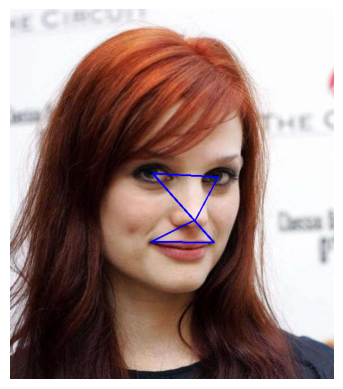

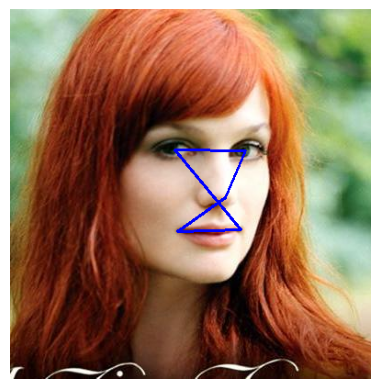

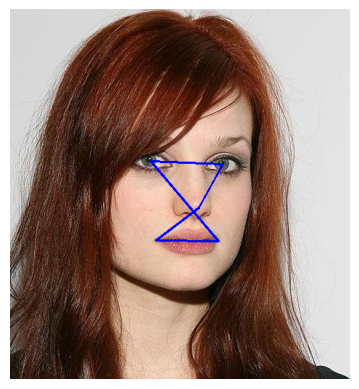

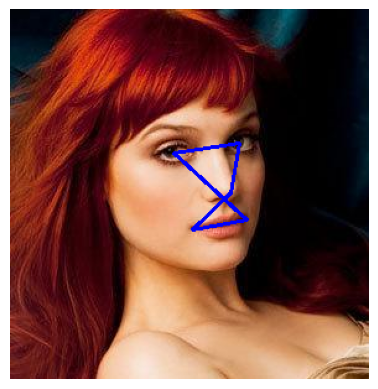

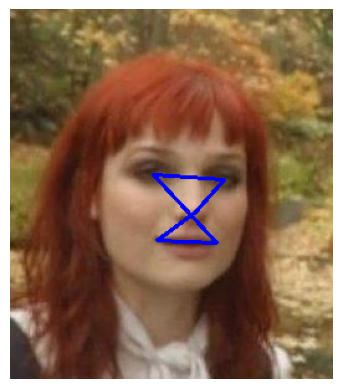

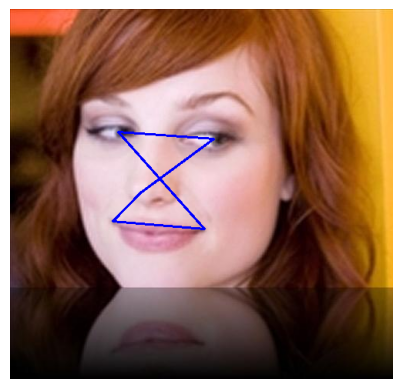

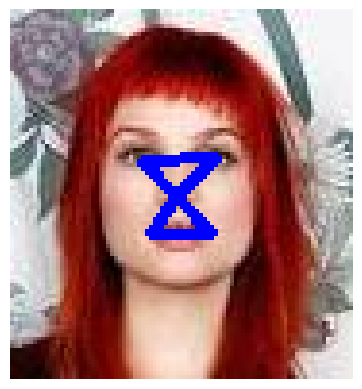

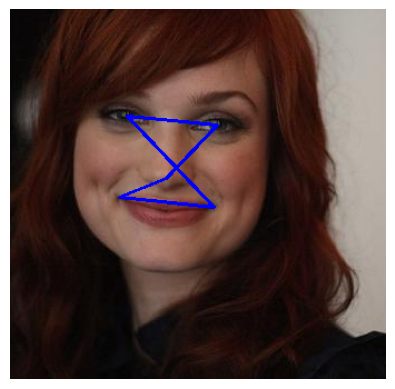

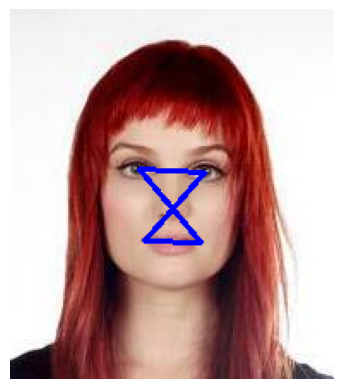

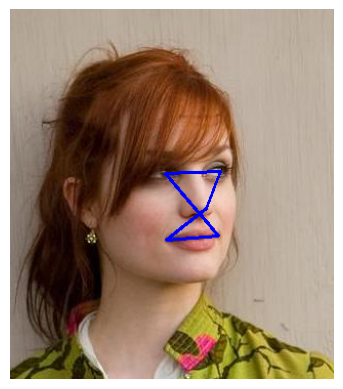

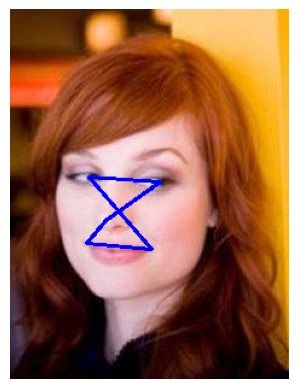

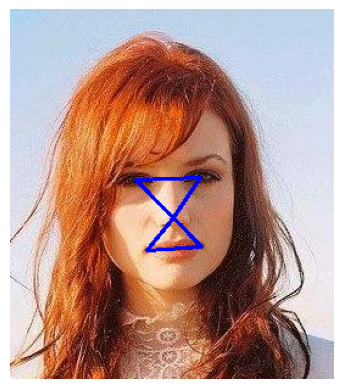

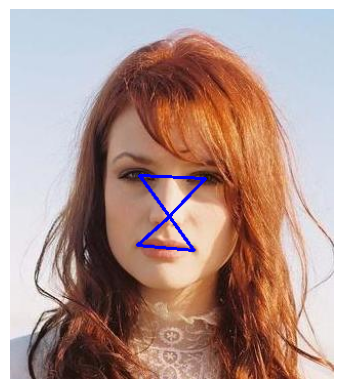

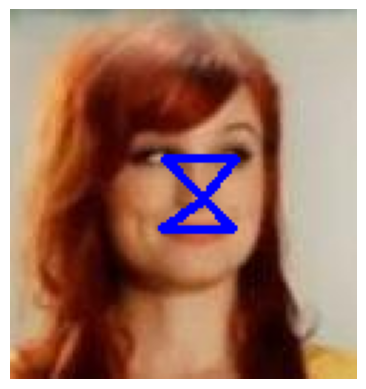

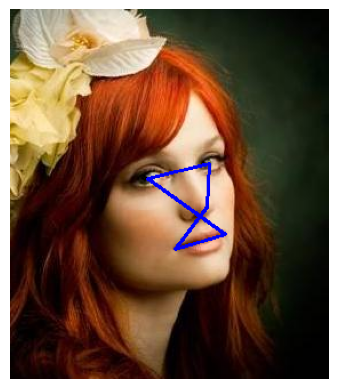

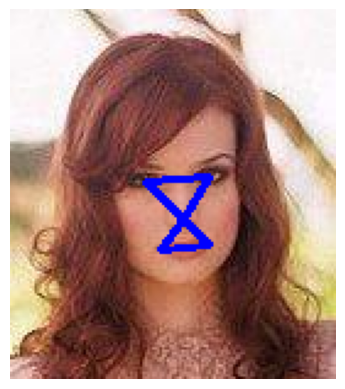

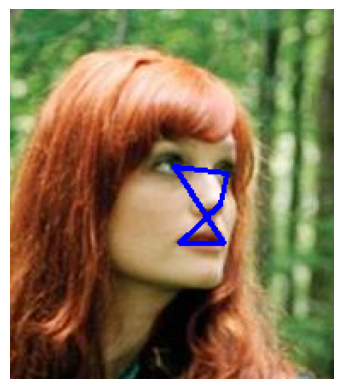

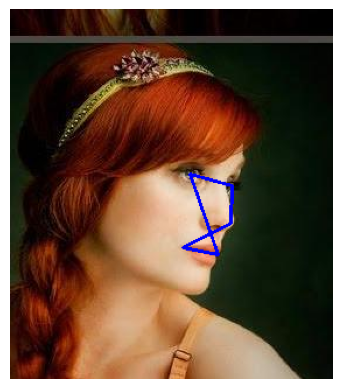

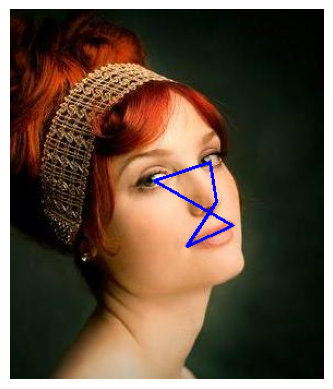

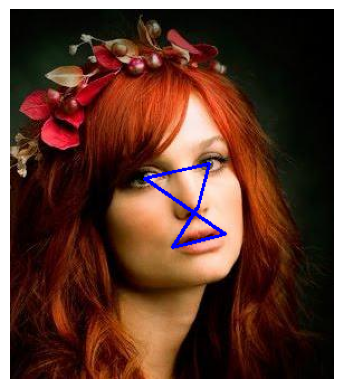

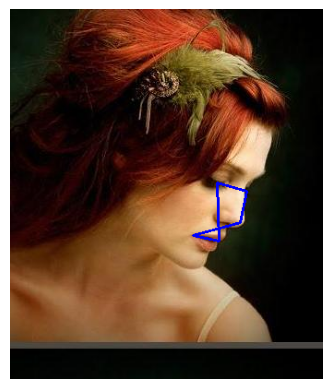

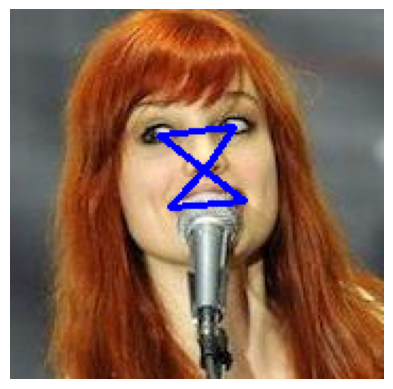

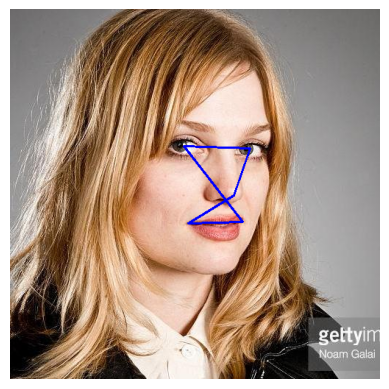

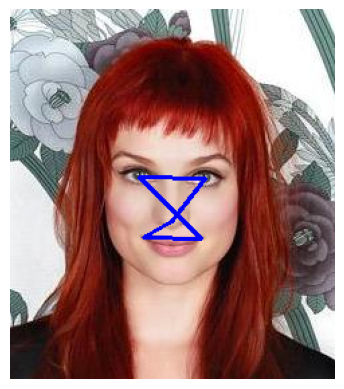

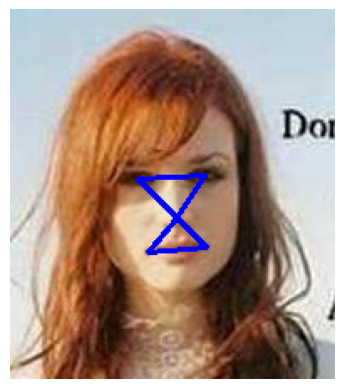

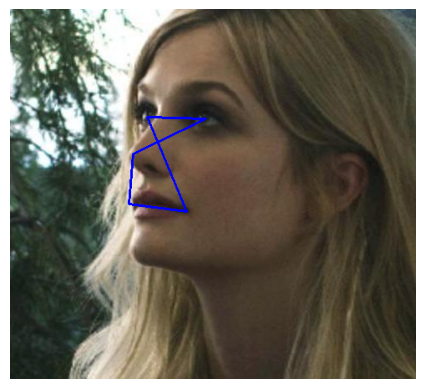

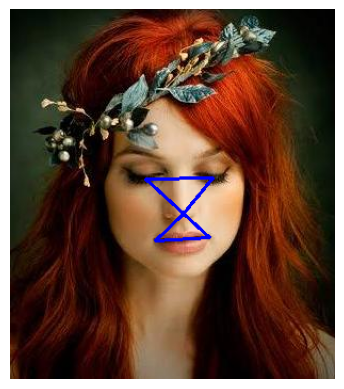

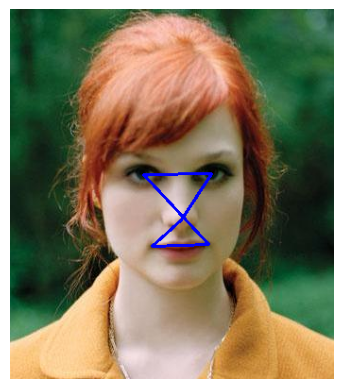

In [48]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
c = 1
# Loop through each row of the DataFrame
for index, row in annotations.iterrows():
    image_path = row['NAME_ID']
    # print(image_path)
    landmarks = [(row[f'P{i}X'], row[f'P{i}Y']) for i in range(1, 6)]
    # print(landmarks)
    c+=1
    if c == 30:
        break
    # Load the image
    img = cv2.imread(image_path)
    landmarks = np.array(landmarks,dtype=np.int32)
    landmarks=landmarks.reshape((-1,1,2))

    # Plot the landmarks on the image
#     for x, y in landmarks:
#         cv2.polylines(img, (int(x), int(y)), 5, (255, 0, 0), -1)  # Blue circles for landmarks
    cv2.polylines(img, [landmarks], thickness=2, color=(255, 0, 0),isClosed=True)  # Blue circles for landmarks


    # Display the image with landmarks
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
